<a href="https://colab.research.google.com/github/felixzhao/AIML425-ASSN-2/blob/main/P5_12Aug_3_AIML425_Assn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# generate data

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Generate synthetic data
num_samples = 1000
uniform_samples = np.random.uniform(-1, 1, size=(num_samples, 1))
gaussian_samples = np.random.normal(0, 1, size=(num_samples, 2))

# Convert data to PyTorch tensors
uniform_samples = torch.tensor(uniform_samples, dtype=torch.float32)
gaussian_samples = torch.tensor(gaussian_samples, dtype=torch.float32)

# Plot

# Way 3

Epoch [1/100], MMD Loss: 0.13587528467178345
Epoch [2/100], MMD Loss: 0.06210482120513916
Epoch [3/100], MMD Loss: 0.17311358451843262
Epoch [4/100], MMD Loss: 0.15150970220565796
Epoch [5/100], MMD Loss: 0.1488528847694397
Epoch [6/100], MMD Loss: 0.261038601398468
Epoch [7/100], MMD Loss: 0.06773805618286133
Epoch [8/100], MMD Loss: 0.24166208505630493
Epoch [9/100], MMD Loss: 0.2857062518596649
Epoch [10/100], MMD Loss: 0.1089678406715393
Epoch [11/100], MMD Loss: 0.14541596174240112
Epoch [12/100], MMD Loss: 0.11553728580474854
Epoch [13/100], MMD Loss: 0.16165417432785034
Epoch [14/100], MMD Loss: 0.06913506984710693
Epoch [15/100], MMD Loss: 0.18142300844192505
Epoch [16/100], MMD Loss: 0.11734253168106079
Epoch [17/100], MMD Loss: 0.23186922073364258
Epoch [18/100], MMD Loss: 0.06147557497024536
Epoch [19/100], MMD Loss: 0.08382236957550049
Epoch [20/100], MMD Loss: 0.08722865581512451
Epoch [21/100], MMD Loss: 0.11911505460739136
Epoch [22/100], MMD Loss: 0.12151235342025757
Ep

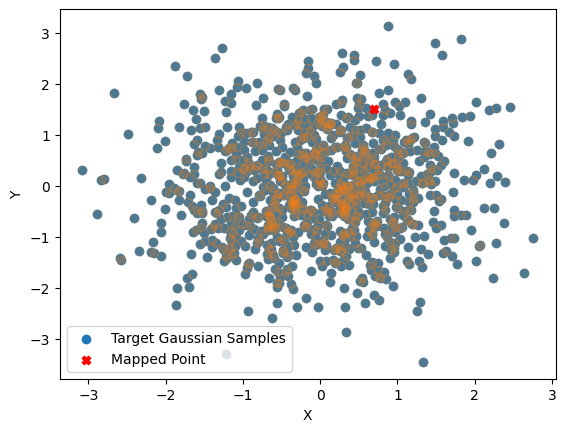

In [14]:


# Design the neural network architecture with dropout
class GaussianGenerator(nn.Module):
    def __init__(self, dropout_prob=0.5):
        super(GaussianGenerator, self).__init__()
        self.fc1 = nn.Linear(1, 128)
        self.dropout1 = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(128, 128)
        self.dropout2 = nn.Dropout(dropout_prob)
        self.fc3 = nn.Linear(128, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Define the Gaussian kernel
def gaussian_kernel(x, y, sigma=1.0):
    # Compute the Gaussian kernel matrix
    dist_squared = torch.sum((x.unsqueeze(1) - y)**2, dim=-1)
    kernel = torch.exp(-dist_squared / (2 * sigma**2))
    return kernel

# Define the Maximum Mean Discrepancy (MMD) loss function
def compute_mmd(x, y):
    sigma = 1.0  # Adjust the Gaussian kernel bandwidth as needed
    x_kernel = gaussian_kernel(x, x, sigma)
    y_kernel = gaussian_kernel(y, y, sigma)
    xy_kernel = gaussian_kernel(x, y, sigma)
    mmd = torch.mean(x_kernel) + torch.mean(y_kernel) - 2 * torch.mean(xy_kernel)
    return mmd

# Initialize the model
model = GaussianGenerator(dropout_prob=0.5)

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with MMD loss
num_epochs = 100
batch_size = 32

for epoch in range(num_epochs):
    for i in range(0, num_samples, batch_size):
        batch_uniform = uniform_samples[i:i+batch_size]
        batch_gaussian = gaussian_samples[i:i+batch_size]

        # Forward pass
        outputs = model(batch_uniform)

        # Compute MMD loss
        mmd_loss = compute_mmd(outputs, batch_gaussian)

        # Backpropagation and optimization
        optimizer.zero_grad()
        mmd_loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], MMD Loss: {mmd_loss.item()}")

# Visualize the transformation (individual point move plot)
input_point = torch.tensor([[0.5]], dtype=torch.float32)  # Adjust input as needed
output_point = model(input_point).detach().numpy()

plt.scatter(gaussian_samples[:, 0], gaussian_samples[:, 1], label='Target Gaussian Samples')
plt.scatter(gaussian_samples[:, 0], gaussian_samples[:, 1], alpha=0.2)  # Faded target points
plt.scatter(output_point[:, 0], output_point[:, 1], c='r', marker='X', label='Mapped Point')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [15]:
pred_y = model(uniform_samples).detach().numpy()

In [16]:
print("Shape of one_d_points (Z):", uniform_samples.shape)
print("Shape of two_d_points (y_pred):", pred_y.shape)


Shape of one_d_points (Z): torch.Size([1000, 1])
Shape of two_d_points (y_pred): (1000, 2)


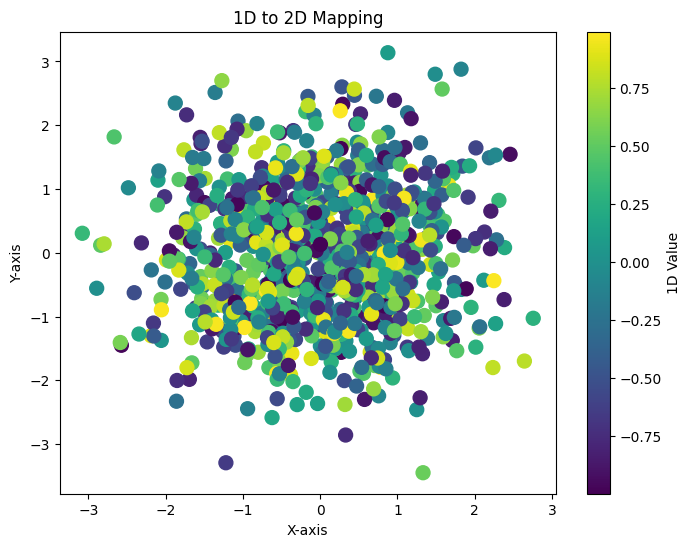

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Sample Data Preparation
# Generate 10 points between 0 and 10
one_d_points = uniform_samples

# For each 1D point, map it to a random point in 2D
two_d_points = gaussian_samples
# 2. Plotting
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(two_d_points[:, 0], two_d_points[:, 1], c=one_d_points, cmap='viridis', s=100)

# Adding colorbar and title
cbar = plt.colorbar()
cbar.set_label('1D Value')
plt.title('1D to 2D Mapping')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.show()


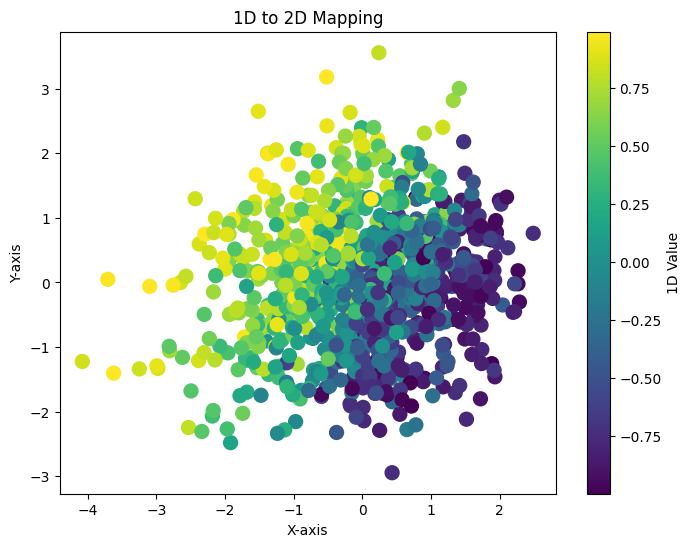

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Sample Data Preparation
# Generate 10 points between 0 and 10
one_d_points = uniform_samples

# For each 1D point, map it to a random point in 2D
two_d_points = pred_y
# 2. Plotting
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(two_d_points[:, 0], two_d_points[:, 1], c=one_d_points, cmap='viridis', s=100)

# Adding colorbar and title
cbar = plt.colorbar()
cbar.set_label('1D Value')
plt.title('1D to 2D Mapping')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.show()
